# Homework 2

### 1. Implement the class `Stacks` and all its methods using singly linked lists. Analyze the runtime and memory complexity, and compare with what we studied in class

In [1]:
# Codigo copiado de la clase.
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node
    def insert_head(self, new_node):
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null 
        new_node.set_next_node(self.head_node)
        self.head_node = new_node
    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null 
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)
    
    #Metodo propio
    def pop_tail(self):
        '''Metodo auxiliar para eliminar la cabeza de la linked list, 
        devuelve el valor del nodo eliminado.'''
        prev_head_node = self.head_node
        self.head_node = self.head_node.next_node
        prev_head_node.next_node = None
        return prev_head_node.val
        

In [2]:
class myStack(object):
    """
    Implementation of the stack data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.stack = Singly_linked_list()       #Instancio la clase Singly_linked_list para poder acceder a sus metodos y atributos
    def push(self, item):
        """
        Add new item to the stack
        Complejidad memoria y runtime: O(1)

        """
        if not (self.l == self.n):
            new_item = Node(item)
            self.stack.insert_head(new_item) #Inserto el nuevo elemento como nodo cabeza de la linked list para poder eliminarlo primero.
            self.l += 1
        else:
            raise ValueError("Stack is full")  
    def pop(self):
        """
        Remove an element from the stack
        Complejidad memoria y runtime: O(1)
        """
        if not (self.l == 0):
            pop_item = self.stack.pop_tail() #Usamos la funcion pop_tail implementado en la clase Singly_linked_list.
            self.l -= 1
            return pop_item #Retornamos el valor eliminado.
        else:
            raise ValueError("Stack is empty")
    def top(self):
        """
        Show the top element of the stack
        Complejidad memoria y runtime: O(1)
        """
        return self.stack.head_node.val #Valor del ultimo elemento agregado al stack.
    def full(self):
        """
        Is the stack full?
        Complejidad memoria y runtime: O(1)
        """
        return self.l == self.n
    def empty(self):
        """
        Is the stack empty?
        Complejidad memoria y runtime: O(1)
        """
        return self.l == 0
    def size(self):
        """
        Return size of the stack
        Complejidad memoria y runtime: O(1)
        """
        return self.l



Comprobaciones de correctitud de implementacion.

In [3]:
mStack = myStack(5)
mStack.push('A')
mStack.push('B')
mStack.push('C')
mStack.push('D')

print('Stack:')
mStack.stack.list_traversed()


Stack:
D
C
B
A


In [4]:
print("Pop item:", mStack.pop())
print('Stack:')
mStack.stack.list_traversed()

Pop item: D
Stack:
C
B
A


In [5]:
mStack.push('D')
mStack.push('E')

m2Stack = myStack(5)

print(mStack.full())
print(m2Stack.empty())

m2Stack.push('A')
mStack.pop()

print(mStack.full())
print(m2Stack.empty())

True
True
False
False


In [6]:

print(mStack.top())
print(mStack.size())

D
4



Todas las funciones implementadas en la clase 'Stack' a partir de 'Simply_Linked_List' tienen una complejidad $O(1)$ en runtime y memoria (constante) al igual que las vistas en clase; asi, no hay una mejor que otra, seria cuestion del programador elegir cual se adapta mejor a sus gustos y conocimientos.

Colaboracion con: Josué Endara

### 2. Write a method part of the linked list class that will reverse the linked list. Your implementation should visit each node in the list only one time, and should use $O(1)$ of extra memory.


> For example, if the list is:

> A -> B -> C -> D -> null

> The method must return:

> D -> C -> B -> A -> null



In [7]:
class Singly_linked_list(Singly_linked_list):
    def reverse_linked_list(self):
        '''Revierte la linked list'''
        prev_node = None 
        curr_node = self.head_node # El primer nodo que se visita es la cabeza de la linked list
        # Se recorre una sola vez por cada nodo hasta llegar al ultimo (que apunta al valor Nulo)
        while curr_node != None:
            next_node = curr_node.next_node # next_node apunta al siguiente nodo del actual.
            curr_node.next_node = prev_node # el nodo siguiente al actual ahora es el previo. En la primera iteracion apuntara a nulo.
                                            #Esta linea, en general, es la encargada de dar la vuelta a la linked list
            
            #Seteamos los valores para la siguiente iteracion
            prev_node = curr_node # El nodo previo se convierte en el actual
            curr_node = next_node # El nodo actual ahora es el siguiente y se repite el bucle hasta que next_node sea nulo y curr_node tome dicho valor.
            
        self.head_node = prev_node #Finalmente la cabeza de la linked list es definida como el ultimo nodo visitado en el bucle while.

In [8]:
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)

node1.set_next_node(node2)
node2.set_next_node(node3)
node3.set_next_node(node4)

ll1 = Singly_linked_list(node1)
ll1.list_traversed()
ll1.reverse_linked_list()
print()
ll1.list_traversed()

1
2
3
4

4
3
2
1


### 3. Implement the class Queue using stacks. 

> a. Analyze the runtime and memory complexity, and compare with what we implemented in class.

> b. Implement a few test cases that would allow you to measure the difference in runtime of the `dequeue` method. (Hint: what is the worst case, so that dequeue of the stack implementation is greater than the implementation we did in class?)


In [9]:
from time import time
from time import time_ns
from time import sleep

#Python decorator
def dec_timer(passed_func):
    def wrap(*args, **kwargs): #Inner function
        t_init = time()*10**6 #Toma del tiempo inicial
        result = passed_func(*args, **kwargs) #Se ejecuta la fucion a evaluar su tiempo de ejecucion
        t_final = time()*10**6 #Toma el tiempo final
        t_total = t_final-t_init
        return (result, t_total) #Retorna el valor de la funcion de interes
    return wrap #Completa el decorador

In [10]:
# Reutilizamos el codigo visto en clase
import ctypes
class Stack(object):
    """
    Implementation of the stack data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.stack = self._create_stack(self.n)        
    
    def _create_stack(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    def push(self, item):
        """
        Add new item to the stack
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.stack[self.l] = item
        self.l += 1
    def pop(self):
        """
        Remove an element from the stack
        """
        # self.l = 0
        # 0 is equivalent to False
        # any number != 0 is True
        if not self.l:
            raise('stack is empty')
        c = self.stack[self.l-1]
        self.stack[self.l] = ctypes.py_object
        self.l -= 1
        return c
    def top(self):
        """
        Show the top element of the stack
        """
        return self.stack[self.l-1]
    def full(self):
        """
        Is the stack full?
        """
        return self.l == self.n

    def empty(self):
        """
        Is the stack empty?
        """
        return self.l == 0

    def size(self):
        """
        Return size of the stack
        """
        return self.l

In [11]:
#La implementacion de la Clase Queue se basa en la segunda forma explicada en clase sobre como implementar queues a partir de stacks 'Queues.pdf'
class Queue(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.enQueue_s = Stack(n)
        self.deQueue_s = Stack(n)    #Se inicializan dos objetos Stack. Esto nos ayudara en la complejidad de los metodos enqueue y dequeue
    def enqueue(self, item):
        """
        Add new item to the queue
        Complexity: O(1)
        """
        if self.l == self.n:
            raise ValueError("Queue is full")
        self.enQueue_s.push(item) #Se agrega un elemento al stack de enqueue
        if self.deQueue_s.empty(): #Si el stack dequeue esta vacio, se hace un push del elemento que estaba en el stack enqueue y a este se lo elimina con pop.
            from_enq_item = self.enQueue_s.pop()
            self.deQueue_s.push(from_enq_item)
        self.l += 1 
    @dec_timer #Uso del decorador
    def dequeue(self):
        """
        Remove an element from the queue
        Complexity: Amortized O(1)
        El peor de los casos se da cuando el stack dequeue está vacío y se tiene que rellenarlo con los elementos almacenados en el stack enqueue. Complejidad O(n)
        El mejor de los casos se da cuando el stack dequeue tiene los elementos ya invertidos y solo se realiza un pop. Complejidad O(1).
        """
        try:
            pop_item = self.deQueue_s.pop() #Almacenamos el elemento popeado del stack dequeue
            if self.deQueue_s.empty(): #Si al hacer el pop nuestro stack dequeue se queda vacio, lo llenamos con los elementos almancenados en el stack enqueue de forma invertida
                for i in range(self.enQueue_s.size()):
                    from_enq_item = self.enQueue_s.pop() #Hacemos pop de los elementos del stack enqueue
                    self.deQueue_s.push(from_enq_item) #Guardamos los elementos popeados anteriormente en el stack dequeue, esto hara que esten de forma invertida.
            self.l -= 1
            return pop_item
        except: #Si ya no hay mas elementos para popear, lanza un error advirtiendo que la queue esta vacia.
            raise ValueError('Queue is empty')
    def full(self):
        """
        Is the queue full?
        """
        return self.l == self.n

    def empty(self):
        """
        Is the queue empty?
        """
        return self.l == 0

    def size(self):
        """
        Return size of the queue
        """
        return self.l

Comprobación de correctitud de la implementación

In [12]:
mQueue = Queue(4) #Creacion de Queue y enqueue de elementos
mQueue.enqueue(1)
mQueue.enqueue(2)
mQueue.enqueue(3)
mQueue.enqueue(4)


In [13]:
print(mQueue.dequeue()[0]) #dequeue de elementos

1


In [14]:
print(mQueue.dequeue()[0])

2


In [15]:
mQueue.enqueue(5) # enqueue de nuevos elementos
mQueue.enqueue(6)
print(mQueue.dequeue()[0])

3


In [16]:
print(mQueue.dequeue()[0]) # Se mantiene el orden de salida al momento de hacer enqueue
print(mQueue.dequeue()[0])

4
5


a. En los metodos que se implementaron en clases el metodo "enqueue" tenia un runtime complexity $O(1)$ al igual que el implementado con Stacks, entonces realmente no existe una diferencia significativa entre ambos. Por otro lado, el metodo "dequeue" implementado en clases tenia runtime complexity $O(n)$, en cambio, el que implementé con Stacks tiene runtime complexity $Amortized-O(1)$: supongamos que realizamos un enqueue de 10 items, el primer dequeue tendra complejidad $O(n)$ porque todos los elementos que estaban en la enqueue stack seran movidos al dequeue stack; a partir del segundo dequeue que se haga, la complejidad será $O(1)$ ya que solo se llamara al metodo pop para eliminar los elementos del dequeue stack, funcion que es de complejidad constante.\
En cuanto a memoria, la complejidad es $O(1)$ ya que solo se esta "visitando" cada item una sola vez y es seguro que no existen memory leaks.

b. Implement a few test cases that would allow you to measure the difference in runtime of the `dequeue` method. (Hint: what is the worst case, so that dequeue of the stack implementation is greater than the implementation we did in class?)

In [29]:
#Reusando el codigo de implementación de queues visto en clase.
import ctypes
class CQueue(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.queue = self._create_queue(self.n)        
    
    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue[self.l] = item
        self.l += 1
    @dec_timer #Uso del decorador
    def dequeue(self):
        """
        Remove an element from the queue
        """
        c = self.queue[0]
        for i in range(1,self.l):
            self.queue[i-1] = self.queue[i]
        self.queue[self.l - 1] = ctypes.py_object
        self.l -= 1
        return c

Primero, haremos una graficacion de los tiempos de ejecucion en el peor de los casos para el metodo "dequeue" que se ha implmentado en la clase "Queue" haciendo uso de Stacks. El peor de los casos se da cuando, una vez realizado el "enqueue" de todos los elementos, se hace el primer dequeue, ya que, se pasan todos los elementos del stack enqueue al stack dequeue, resultando en una complejidad $O(n)$. 

In [60]:
stack_queues_times = []
class_queues_times = []

n = [10**2, 10**3, 10**4, 10**5, 10**6]

for i in range(len(n)):
    sQueue = Queue(n[i])
    clQueue = CQueue(n[i])

    for j in range(n[i]):
        sQueue.enqueue(j)
        clQueue.enqueue(j)

    stack_queues_times.append(sQueue.dequeue()[1]) #Primer dequeue, se toman los tiempos.
    class_queues_times.append(clQueue.dequeue()[1]) #Primer dequeue, se toman los tiempos.


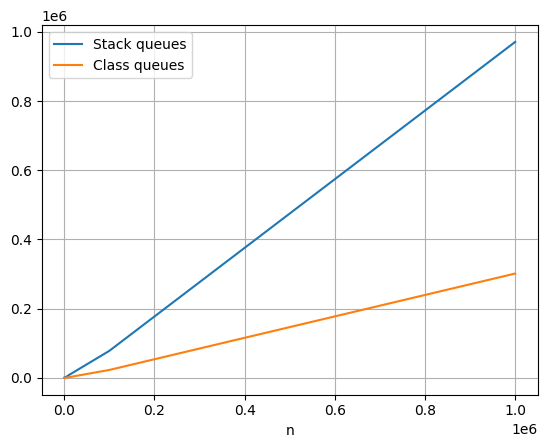

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

df_queues_times = pd.DataFrame() #Inicializo el frame para los datos
df_queues_times["n"] = n

#Creacion de la tabla de datos con los valores almacenados de tiempos de ejecucion
df_queues_times["Stack queues"] = stack_queues_times
df_queues_times["Class queues"] = class_queues_times

# Graficacion de los tiempos de ejecucion
df_queues_times.plot(x='n')
plt.xlabel('n')
plt.grid()

Como se observa, el primer dequeue hasta llega a ser mas costoso que el implementado en clases, pero la complejidad sigue siendo la determinada anteriormente.\
Ahora, probemos el mejor de los casos para el metodo "dequeue" implementado con stacks, es decir, una vez se realiza el primer dequeue, volvemos a llamar al metodo. De acuerdo a lo anteriormente programado y explicado, la complejidad deberia ser $O(1)$.

In [63]:
stack_queues_times = []
class_queues_times = []

n = [10**2, 10**3, 10**4, 10**5, 10**6]

for i in range(len(n)):
    sQueue = Queue(n[i])
    clQueue = CQueue(n[i])

    for j in range(n[i]):
        sQueue.enqueue(j)
        clQueue.enqueue(j)

    sQueue.dequeue() #Se realiza el primer dequeue a fin de obtener el caso favorable en la siguiente linea.
    stack_queues_times.append(sQueue.dequeue()[1]) # Se hace un segundo dequeue y se toma el tiempo.
    class_queues_times.append(clQueue.dequeue()[1])

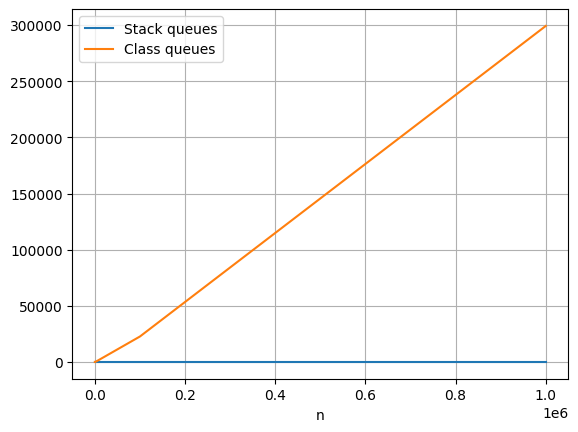

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

df_queues_times = pd.DataFrame() #Inicializo el frame para los datos
df_queues_times["n"] = n

#Creacion de la tabla de datos con los valores almacenados de tiempos de ejecucion
df_queues_times["Stack queues"] = stack_queues_times
df_queues_times["Class queues"] = class_queues_times

# Graficacion de los tiempos de ejecucion
df_queues_times.plot(x='n')
plt.xlabel('n')
plt.grid()

Como se observa, efectivamente, a partir del segundo llamado a dequeue, la complejidad se vuelve constante $O(1)$ y es mucho mejor que el implementado en clases.\
Colaboracion con Josue Endara

### 4. Complete the PriorityQueue class, so that when we call `dequeue`, the element with the highest priority will be returned. Analyze the complexity of runtime and memory of the `enqueue` and `dequeue` methods.

A = [4, 2, 7, 5, 9]  # O(n^2)

B = [1, 3, 4, 5]
insert 2 in B, such that B is still sorted 
Not O(n^2)

In [20]:
#Tomando el codigo realizado en clase.
import ctypes
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    element of queue (k, n) k-priority, n-value. k lowest -> highest priority
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.queue = self._create_queue(self.n)        
    
    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue[self.l] = item # Agrego el nuevo item al ultimo de la priority queue

        self.l += 1

        # Una vez insertado el item se orgniza la priority queue
        #Aplicacion y modificacion del metodo de insertion sort para organizacion de tuplas.
        for i in range(1, self.l):
            qTuple = self.queue[i]
            j = i - 1
            while j >= 0 and self.queue[j][0] > qTuple[0]:
                self.queue[j+1] = self.queue[j]
                j -= 1
            self.queue[j+1] = qTuple
            
    def dequeue(self):
        """
        Delete the item with the highest priority (lowest k value) of the queue
        """
        pop_item = self.queue[0]
        self.queue = self.queue[1:] #List slicing. Redefino la queue a partir del item con indice 1. 
        return pop_item

In [21]:
pQueue = PriorityQueue(5)
pQueue.enqueue((4,5))
pQueue.enqueue((2,4))
pQueue.enqueue((1,3))
pQueue.enqueue((1,34))
pQueue.enqueue((45, 1))

In [22]:
pQueue.queue[:pQueue.l]

[(1, 3), (1, 34), (2, 4), (4, 5), (45, 1)]

In [23]:
pQueue.dequeue()

(1, 3)

In [24]:
pQueue.dequeue()

(1, 34)

In [25]:
pQueue.queue[:pQueue.l]

[(2, 4), (4, 5), (45, 1)]

Dado que el metodo enqueue utiliza insertion sort para organizar las tuplas de acuerdo a la prioridad de los elementos ingresados, su complejidad de tiempo de ejecución es $O(n^2)$, la complejidad en memoria es $O(1)$ ya que, en el peor de los casos, se 'visita' los elementos una vez.\
A primera vista el metodo dequeue parece que tiene una complejidad $O(1)$ en tiempo de ejecucion, sin embargo, se esta utilizando Python List Slicing para redefinir la priority queue a partir del item de indice 1 ya que se supone que se ha eliminado el primer item (mayor prioridad). Por esto, la complejidad del metodo dequeue seria $O(n-1)$ que seria equivalente a: $O(m)$ tal que $m<n$.

### 5. A given linked-list (singly or doubly) represents an integer number. For example, 345 is represented by the singly-linked list 3 -> 4 ->5. Write a Python program that does the following:

1. Receives three integers A, B and C as inputs. Assume that the three number have the same number of digits.

2. Transform the numbers to their corresponding linked lists

3. Implement the sum of the three numbers. The result A + B + C must be stored in a linked list. 

4. Print the result by traversing the list. 

5. Run your program for numbers with 1 to 100 digits, and capture the runtime. Use these number to estimate the complexity of the runtime.
    - Hint: write a small function that uses `randint()` to generate a number of a given number of digits 
6. Analitically estimate the runtime complexity and compare with the one obtained in (5).

3->4->5\
1->2->3\
5->6->7

1->0->3->5

In [94]:
@dec_timer # Uso del decorador
def sum_ints_as_linked_lists(A, B, C):
    '''
    Convierte 3 integers en linked lists
    '''
    #Se separa cada digito del integer y se lo almacena como un elemento de un array
    Adgts = [int(d) for d in str(A)]
    Bdgts = [int(d) for d in str(B)]
    Cdgts = [int(d) for d in str(C)]

    # Se comprueba si todos los numeros tienen la misma cantidad de digitos
    if not(len(Adgts) == len(Bdgts) and len(Adgts) == len(Cdgts)):
        raise ValueError('Numbers with different number of digts.')

    # Setea el primer nodo como el primer elemento de los array, equivalente al primer digito del integer.
    Anode = Node(Adgts[0])
    Bnode = Node(Bdgts[0])
    Cnode = Node(Cdgts[0])

    # Se crean las linked list tomando como cabeza de la lista el primer nodo anteriormente definido.
    lA = Singly_linked_list(Anode)
    lB = Singly_linked_list(Bnode)
    lC = Singly_linked_list(Cnode)

    # Se agregan los demas digitos a manera de nodos. 
    for i in range(1, len(Adgts)):
        lA.insert_tail(Node(Adgts[i]))
        lB.insert_tail(Node(Bdgts[i]))
        lC.insert_tail(Node(Cdgts[i]))
    
    # Para facilidad de calculo (sumar numeros de n digitos de forma tradicional) se invierten las linked lists.
    lA.reverse_linked_list()
    lB.reverse_linked_list()
    lC.reverse_linked_list()

    # Inicializacion de variables para las cuentas
    sum = 0 # Suma de digitos
    rem = 0 # Representa lo que 'llevo', es decir, si sumo 9+4 el resultado es 13, mantengo el 3 y 'llevo' 1. 
    result_head_node = None # Cabeza de nodo del numero resultante.
    p_node = None # Nodo auxiliar.

    for i in range(len(Adgts)): # Como es conocido que la cantidad de digitos de todos los numeros es la misma, se puede escribir esta linea.

        sum = rem + lA.head_node.val + lB.head_node.val + lC.head_node.val # Sumamos los valores de los nodo cabeza y lo que 'llevo'.
        
        # Al sumar 3 digitos, el valor maximo que se puede obtener es 27 (9+9+9), entonces definimos los casos de numeros que puedo 'llevar'.
        if sum >= 10 and sum < 20:
            rem = 1
        elif sum >= 20:
            rem = 2
        else: 
            rem = 0
        
        # Por la explicacion anterior, unicamente tomamos el ultimo digito de la suma
        # En caso de tener un solo digito, se mantiene
        sum %= 10

        # El valor de sum se lo almacena como un nuevo nodo, para ir formando la linked list
        new_node = Node(sum)
        
        if not result_head_node: # Caso inicial, setea la cabeza de nodo como el primer valor de sum.
            result_head_node = new_node
        else: # En las demas iteraciones, seteamos los nodos siguientes con los nuevos valores de sum. Como esta linea no se ejecuta nunca
              # en la primera iteracion, no existe problema que hayamos definido inicialmente p_node = None.
            p_node.next_node = new_node
        
        # p_node se actualiza al nuevo nodo actual (valor de sum en la i-th iteracion)
        p_node = new_node

        # Se actualizan las cabezas de los nodos para la siguiente iteracion.
        lA.head_node = lA.head_node.next_node
    
        lB.head_node = lB.head_node.next_node
    
        lC.head_node = lC.head_node.next_node

    # Si en la ultima iteracion el valor de sum fue > 9, se tendra algo que 'llevar', este valor se agrega como el ultimo nodo de la suma
    if rem > 0:
        new_node.next_node = Node(rem)

    resultant_linked_list = Singly_linked_list(result_head_node)
    # Recordar que para facilidad de calculo se invirtieron las linked list, entonces la resultante tambien estara invertida
    # Debemos darle la vuelta nuevamente para obtener el resultado final y correcto.
    resultant_linked_list.reverse_linked_list()
    return resultant_linked_list

In [95]:
final_linked_list = sum_ints_as_linked_lists(12345678, 65438764, 86350814)[0]
final_linked_list.list_traversed()

1
6
4
1
3
5
2
5
6


In [104]:
import random
def rand_n_digit_number(n):
    '''
    Generates a random number of a specified quantity of digits.
    '''
    return random.randint(10**(n-1), 10**n)

sum_linked_lists_times = []
test_range = range(1, 101) # Cantidad de digitos solicitada por el enunciado
for i in test_range:
    sum_linked_lists_times.append(sum_ints_as_linked_lists(rand_n_digit_number(i), rand_n_digit_number(i), rand_n_digit_number(i))[1])



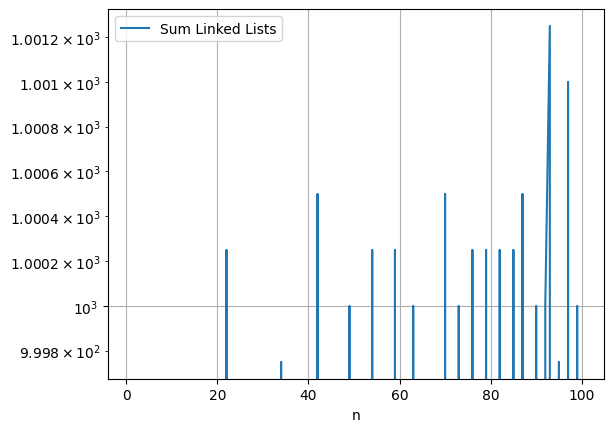

In [108]:
df_sum_ll_times = pd.DataFrame() #Inicializo el frame para los datos
df_sum_ll_times["n"] = test_range

#Creacion de la tabla de datos con los valores almacenados de tiempos de ejecucion
df_sum_ll_times["Sum Linked Lists"] = sum_linked_lists_times

# Graficacion de los tiempos de ejecucion
df_sum_ll_times.plot(x='n', logy=True)
plt.xlabel('n')
plt.grid()

Realmente este grafico donde se visualizan los tiempo de ejecucion para numeros de entre 1 y 100 digitos no es muy claro; si somos muy observadores, se podria decir que tiene una tendencia a crecer conforme el n (cantidad de digitos) crece pero no es certero si es crecimiento lineal o cuadratico.\
A fin de intentar mejorar esto, aumentaremos la cantidad de digitos. 

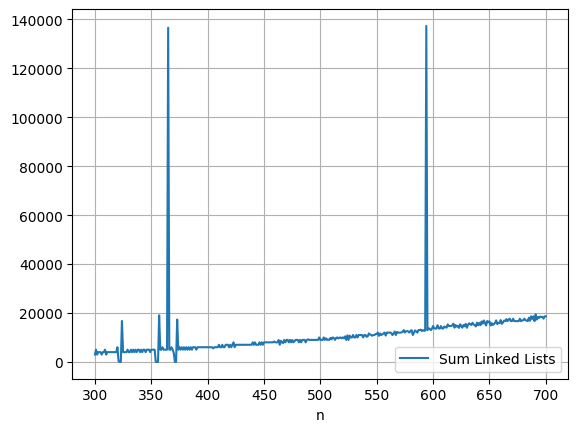

In [111]:
sum_linked_lists_times = []
test_range = range(300, 701) #Incrementamos considerablemente la cantidad de digitos
for i in test_range:
    sum_linked_lists_times.append(sum_ints_as_linked_lists(rand_n_digit_number(i), rand_n_digit_number(i), rand_n_digit_number(i))[1])

df_sum_ll_times = pd.DataFrame() #Inicializo el frame para los datos
df_sum_ll_times["n"] = test_range

#Creacion de la tabla de datos con los valores almacenados de tiempos de ejecucion
df_sum_ll_times["Sum Linked Lists"] = sum_linked_lists_times

# Graficacion de los tiempos de ejecucion
df_sum_ll_times.plot(x='n')
plt.xlabel('n')
plt.grid()

Este grafico es un poco mas ilustrativo. Vemos que, a pesar de existir ciertas anomalias/valores atipicos, la tendencia de crecimiento es lineal. Por tanto podriamos decir que la complejidad del metodo es $O(n)$

Estimando la complejidad analíticamente...\
Si observamos bien el código notaremos que existen alrededor de 9 bucles que iteran n cantidad de veces; no solo los que se ven de forma explicita, sino tambien contando los bucles que se ejecutan cuando se llama a la funcion "reverse_linked_list()" o se hace list comprehension. Sumando estas iteraciones, llegamos al resultado $9n$ de forma exacta, sin embargo, cuando n tiende al infinito el cardinal es irrelevante, por tanto, la complejidad del algoritmo es $O(n)$.\
Esto coincide con las graficas del literal anterior.\
Colaboracion con Josue Endara